# Data Preprocessing


In [2]:
%load_ext autoreload

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)


In [4]:
# extra imports
from pandas import read_csv
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
#from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
#from scipy.stats import boxcox

# Section 1: Reading the file data 

Reading the train.csv file to look for the target variable and total number of rows and column present in dataset


In [5]:
mobile = read_csv("Data/train.csv", header=0, delimiter=',')
mobile.shape

(2000, 21)

In [6]:
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
## Checking for number of Classes we have for the target variable
mobile.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [8]:
#Looking for the data types of the columns
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Section 2: Inspection of the dataset

Perform a basic inspection of the dataset to 
1. check for the minimum and maximum values for each variable 
2. find possible errors and abnormal values (outliers)
3. find possible missing values; 

In [65]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,...,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,1238.518,0.495,1.522,0.509,5.555,0.521,32.047,0.502,140.249,4.521,...,644.917,1251.515,2124.213,12.306,6.334,11.011,0.761,0.503,0.507,1.500
std,439.418,0.500,0.816,0.500,3.984,0.500,18.146,0.288,35.400,2.288,...,442.051,432.199,1084.732,4.213,4.172,5.464,0.426,0.500,0.500,1.118
min,501.000,0.000,0.500,0.000,1.000,0.000,2.000,0.100,80.000,1.000,...,1.000,500.000,256.000,5.000,1.000,2.000,0.000,0.000,0.000,0.000
25%,851.750,0.000,0.700,0.000,2.000,0.000,16.000,0.200,109.000,3.000,...,284.000,874.750,1207.500,9.000,3.000,6.000,1.000,0.000,0.000,0.750
50%,1226.000,0.000,1.500,1.000,5.000,1.000,32.000,0.500,141.000,4.000,...,567.250,1247.000,2146.500,12.000,5.000,11.000,1.000,1.000,1.000,1.500
75%,1615.250,1.000,2.200,1.000,8.000,1.000,48.000,0.800,170.000,7.000,...,946.250,1633.000,3064.500,16.000,9.000,16.000,1.000,1.000,1.000,2.250
max,1998.000,1.000,3.000,1.000,17.000,1.000,64.000,1.000,200.000,8.000,...,1920.000,1998.000,3998.000,19.000,18.000,20.000,1.000,1.000,1.000,3.000


The descriptions of the features in the dataset are as follows

1. battery_power : Total energy a battery can store in one time measured in mAh
2. blue : Has bluetooth or not
3. clock_speed : speed at which microprocessor executes instructions
4. dual _sim : Has dual sim support or not
5. fc : Front Camera megapixels
6. four_g : Has 4G or not
7. int_memory : Internal Memory in Gigabytes
8. m_dep : Mobile Depth in cm
9. mobile_wt : Weight of mobile phone
10. n_cores : Number of cores of processor
11. pc : Primary Camera megapixels
12. px_height : Pixel Resolution Height
13. px_width : Pixel Resolution Width
14. ram : Random Access Memory in Megabytes
15. sc_h : Screen Height of mobile in cm
16. sc_w : Screen Width of mobile in cm
17. talk_time : longest time that a single battery charge will last when you are talking
18. three_g : Has 3G or not
19. touch_screen : Has touch screen or not
20. wifi : Has wifi or not
22. price_range : This is the target variable with values of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



# Section 3: Dealing with missing values


In this section we will perfom data cleaning by dealing with missing values, duplicates and incorrect values

In [10]:
#checking for duplicate values
mobile.duplicated().sum()

0

In [11]:
#check for missing values and drop them in our dataset
mobile = mobile.dropna()
mobile.shape

(2000, 21)

The previous code show that no data is found to be null, however incorrect values as detected in px_height and sc_w height is not a proper values, therefore we want to treat all the variables one by one to check for those missing incorrect value

In [12]:
#Checking missing values in categorical data
(mobile.blue==0).value_counts()
(mobile.dual_sim==0).value_counts()
(mobile.four_g==0).value_counts()
(mobile.three_g==0).value_counts()
(mobile.touch_screen==0).value_counts()
(mobile.wifi==0).value_counts()

True     1010
False     990
Name: blue, dtype: int64

False    1019
True      981
Name: dual_sim, dtype: int64

False    1043
True      957
Name: four_g, dtype: int64

False    1523
True      477
Name: three_g, dtype: int64

False    1006
True      994
Name: touch_screen, dtype: int64

False    1014
True      986
Name: wifi, dtype: int64

The code above show that there is no problem with categorical data all the values are correct and no missing value is detected .

In [13]:
#checking the target variable data to detect any missing and incorrect class
mobile['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [14]:
#Checking missing values in continous variale
(mobile.battery_power==0).value_counts()
(mobile.clock_speed==0).value_counts()
(mobile.int_memory==0).value_counts()
(mobile.m_dep==0).value_counts()
(mobile.mobile_wt==0).value_counts()
(mobile.n_cores==0).value_counts()
(mobile.px_width==0).value_counts()
(mobile.ram==0).value_counts()
(mobile.sc_h==0).value_counts()
(mobile.talk_time==0).value_counts()

False    2000
Name: battery_power, dtype: int64

False    2000
Name: clock_speed, dtype: int64

False    2000
Name: int_memory, dtype: int64

False    2000
Name: m_dep, dtype: int64

False    2000
Name: mobile_wt, dtype: int64

False    2000
Name: n_cores, dtype: int64

False    2000
Name: px_width, dtype: int64

False    2000
Name: ram, dtype: int64

False    2000
Name: sc_h, dtype: int64

False    2000
Name: talk_time, dtype: int64

In [15]:
(mobile.fc==0).value_counts()
(mobile.pc==0).value_counts()
(mobile.sc_w==0).value_counts()
(mobile.px_height==0).value_counts()

False    1526
True      474
Name: fc, dtype: int64

False    1899
True      101
Name: pc, dtype: int64

False    1820
True      180
Name: sc_w, dtype: int64

False    1998
True        2
Name: px_height, dtype: int64

The result of the code above show some features; pc,fc,sc_w and px_height have 0 values in some rows, and according to the nature of these features it is impossible to have 0 vales, therefore we assume that these value are not correct and therefore we treat them as missing values.
Since the number of the incorrect value are high we can not just eliminate them and therefore we decide to compute the correct value through Imputation method.

In [66]:
(mobile.fc==0).value_counts()
(mobile.pc==0).value_counts()
(mobile.sc_w==0).value_counts()
(mobile.px_height==0).value_counts()

False    2000
Name: fc, dtype: int64

False    2000
Name: pc, dtype: int64

False    2000
Name: sc_w, dtype: int64

False    2000
Name: px_height, dtype: int64

In [16]:
#assign null value to this row with 0 value
mobile.fc[mobile.fc==0]= np.nan
mobile.pc[mobile.pc==0]= np.nan
mobile.sc_w[mobile.sc_w==0]= np.nan
mobile.px_height[mobile.px_height==0]= np.nan

In [17]:
mobile.fc.describe()
mobile.pc.describe()
mobile.sc_w.describe()
mobile.px_height.describe()

count    1526.000
mean        5.648
std         4.140
min         1.000
25%         2.000
50%         5.000
75%         8.000
max        19.000
Name: fc, dtype: float64

count    1899.000
mean       10.444
std         5.764
min         1.000
25%         6.000
50%        10.000
75%        15.000
max        20.000
Name: pc, dtype: float64

count    1820.000
mean        6.337
std         4.152
min         1.000
25%         3.000
50%         6.000
75%         9.000
max        18.000
Name: sc_w, dtype: float64

count    1998.000
mean      645.754
std       443.533
min         1.000
25%       284.000
50%       565.500
75%       947.750
max      1960.000
Name: px_height, dtype: float64

Here we perform imputation i.e assigning a value to every missing value by a method known as 1NN
For every variable with a missing value, we will look the value of that attribute in the other rows with similar other attribute.

To compute the 1KNN we will make a classifier by dropping the all the columns with missing values and training a classifier for each column, we will drop fc,pc, sc_w column, px_height

In [18]:
#the original dataset before dropping
mobile.shape

(2000, 21)

In [19]:
subset_of_mobile = mobile.drop(columns=['fc', 'pc', 'sc_w','px_height'])
subset_of_mobile.shape

rows_not_missing = mobile.fc.notna() & mobile.pc.notna() & mobile.sc_w.notna() & mobile.px_height.notna()

mobile_without_missings = subset_of_mobile[rows_not_missing]
mobile_without_missings.shape


(2000, 17)

(1393, 17)

In [20]:
#Imputation of 'fc'
fc_missing_values = subset_of_mobile[mobile.fc.isna()]
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mobile_without_missings, mobile.fc[rows_not_missing])
knn_fc = knn.predict(fc_missing_values)

KNeighborsClassifier(n_neighbors=1)

In [21]:
#Imputation of 'pc'
pc_missing_values = subset_of_mobile[mobile.pc.isna()]
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mobile_without_missings, mobile.pc[rows_not_missing])
knn_pc = knn.predict(pc_missing_values)

KNeighborsClassifier(n_neighbors=1)

In [22]:
#Imputation of 'sc_w'
sc_w_missing_values = subset_of_mobile[mobile.sc_w.isna()]
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mobile_without_missings, mobile.sc_w[rows_not_missing])
knn_sc_w = knn.predict(sc_w_missing_values)

KNeighborsClassifier(n_neighbors=1)

In [23]:
#Imputation of 'px_height'
px_height_missing_values = subset_of_mobile[mobile.px_height.isna()]
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mobile_without_missings, mobile.px_height[rows_not_missing])
knn_px_height = knn.predict(px_height_missing_values)

KNeighborsClassifier(n_neighbors=1)

In [24]:
#Filling the value to the missing variable after imputation
mobile.fc[mobile.fc.isna()] = knn_fc
mobile.pc[mobile.pc.isna()] = knn_pc
mobile.sc_w[mobile.sc_w.isna()] = knn_sc_w
mobile.px_height[mobile.px_height.isna()] = knn_px_height


In [25]:
#inspect the new result again after doing imputation
mobile.shape
mobile.describe()

(2000, 21)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,...,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,1238.518,0.495,1.522,0.509,5.686,0.521,32.047,0.502,140.249,4.521,...,646.303,1251.515,2124.213,12.306,6.334,11.011,0.761,0.503,0.507,1.500
std,439.418,0.500,0.816,0.500,4.173,0.500,18.146,0.288,35.400,2.288,...,443.978,432.199,1084.732,4.213,4.172,5.464,0.426,0.500,0.500,1.118
min,501.000,0.000,0.500,0.000,1.000,0.000,2.000,0.100,80.000,1.000,...,1.000,500.000,256.000,5.000,1.000,2.000,0.000,0.000,0.000,0.000
25%,851.750,0.000,0.700,0.000,2.000,0.000,16.000,0.200,109.000,3.000,...,284.000,874.750,1207.500,9.000,3.000,6.000,1.000,0.000,0.000,0.750
50%,1226.000,0.000,1.500,1.000,5.000,1.000,32.000,0.500,141.000,4.000,...,568.000,1247.000,2146.500,12.000,5.000,11.000,1.000,1.000,1.000,1.500
75%,1615.250,1.000,2.200,1.000,8.000,1.000,48.000,0.800,170.000,7.000,...,948.000,1633.000,3064.500,16.000,9.000,16.000,1.000,1.000,1.000,2.250
max,1998.000,1.000,3.000,1.000,19.000,1.000,64.000,1.000,200.000,8.000,...,1960.000,1998.000,3998.000,19.000,18.000,20.000,1.000,1.000,1.000,3.000


# Section 4: Finding Outlier

Some machine learning models are very sensitive to outliers, therefore it is important to identify them so that we can remove them, impute or just knowing that they are existing
Here we draw a boxplot to find outlier in continous features

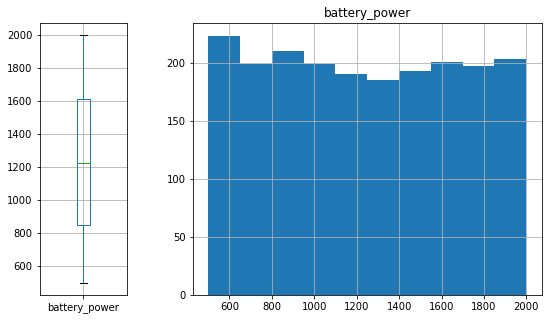

In [26]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='battery_power',ax=axes[0]);
mobile.hist(column='battery_power', ax=axes[1]);

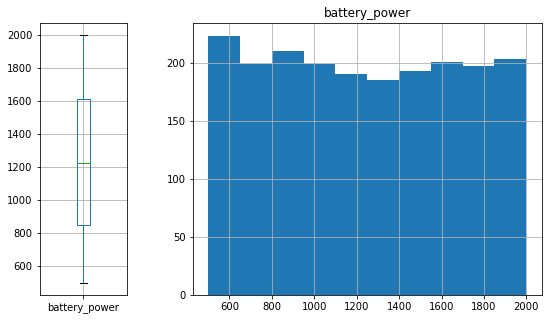

In [27]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='battery_power',ax=axes[0]);
mobile.hist(column='battery_power', ax=axes[1]);

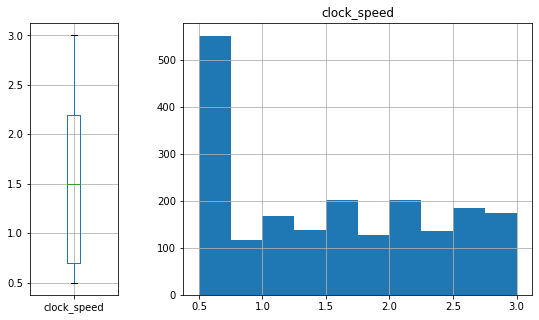

In [28]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='clock_speed',ax=axes[0]);
mobile.hist(column='clock_speed', ax=axes[1]);

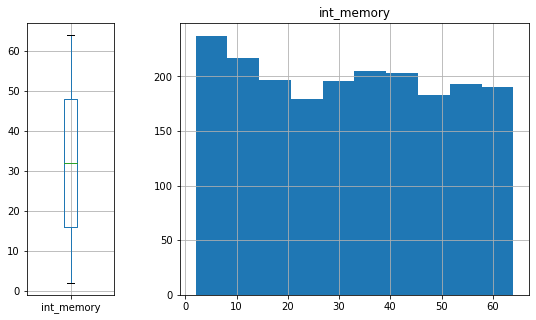

In [29]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='int_memory',ax=axes[0]);
mobile.hist(column='int_memory', ax=axes[1]);

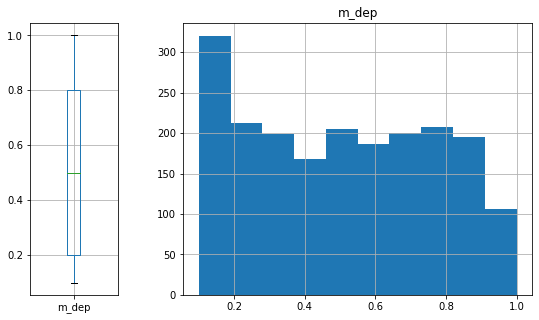

In [30]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='m_dep',ax=axes[0]);
mobile.hist(column='m_dep', ax=axes[1]);

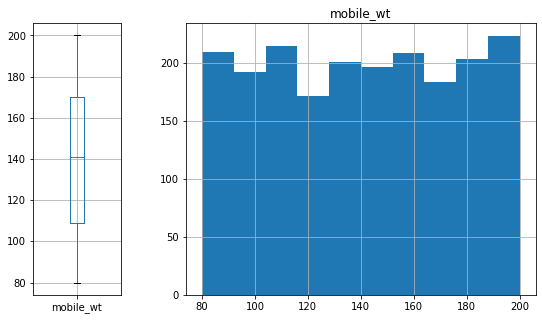

In [31]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='mobile_wt',ax=axes[0]);
mobile.hist(column='mobile_wt', ax=axes[1]);

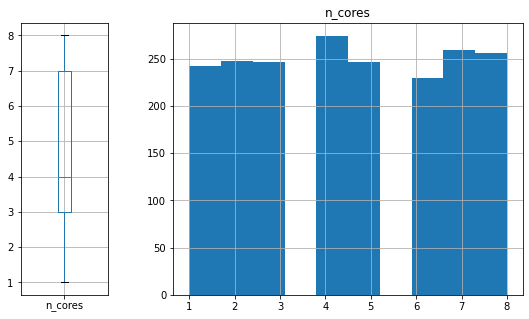

In [32]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='n_cores',ax=axes[0]);
mobile.hist(column='n_cores', ax=axes[1]);

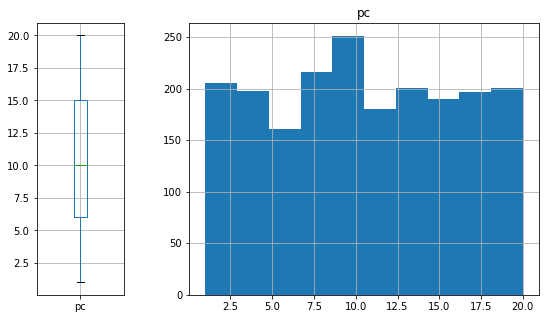

In [33]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='pc',ax=axes[0]);
mobile.hist(column='pc', ax=axes[1]);

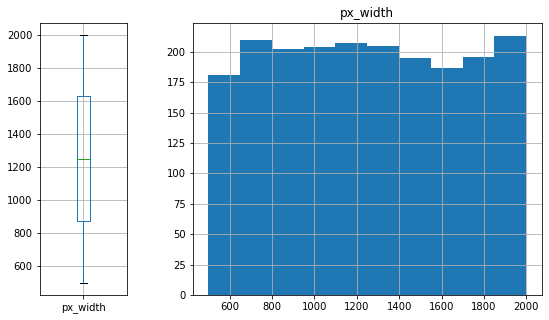

In [34]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='px_width',ax=axes[0]);
mobile.hist(column='px_width', ax=axes[1]);

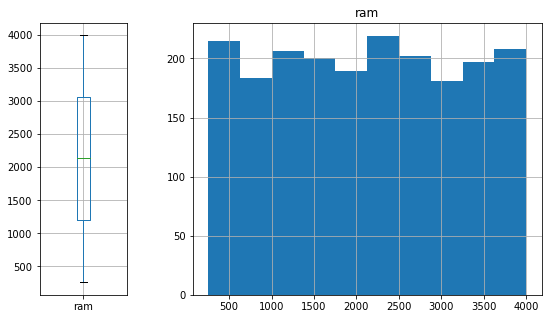

In [35]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='ram',ax=axes[0]);
mobile.hist(column='ram', ax=axes[1]);

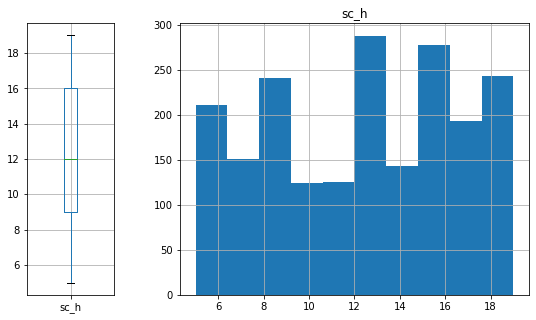

In [36]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='sc_h',ax=axes[0]);
mobile.hist(column='sc_h', ax=axes[1]);

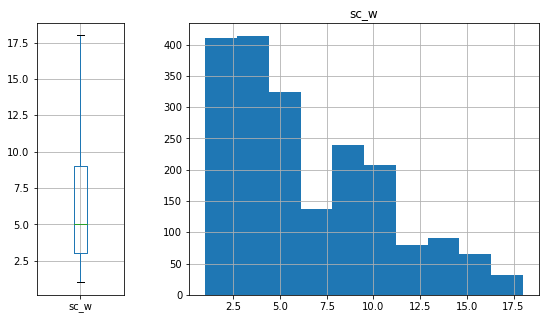

In [37]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='sc_w',ax=axes[0]);
mobile.hist(column='sc_w', ax=axes[1]);

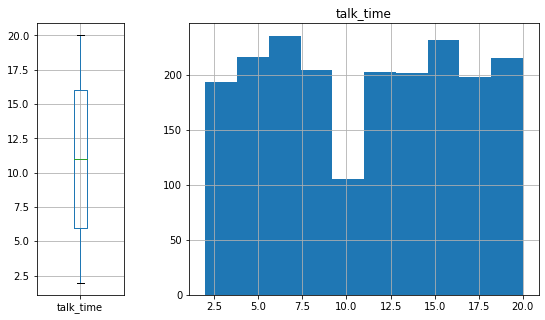

In [38]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='talk_time',ax=axes[0]);
mobile.hist(column='talk_time', ax=axes[1]);

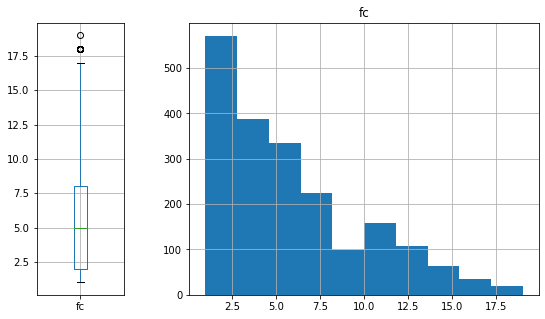

In [39]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='fc',ax=axes[0]);
mobile.hist(column='fc', ax=axes[1]);

The result above show there is an outlier, here we use IQR.

IQR
One easy criteria to decide which values are outliers is to use the distance between quartiles. Specifically, you define the outliers as:

    The values smaller than Q1 - 1.5*IQR
    The values bigger than Q3 + 1.5*IQR

This is the criteria used in the boxplots to marc the outliers. 

In [40]:
Q1 = mobile['fc'].quantile(0.25)
Q3 = mobile['fc'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(2.0, 8.0, 6.0)

In [41]:
small_outliers = mobile['fc'] < (Q1 - 1.5 * IQR)
big_outliers = mobile['fc'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 20)

Performing median value imputation to deal with outliers in "fc" feature

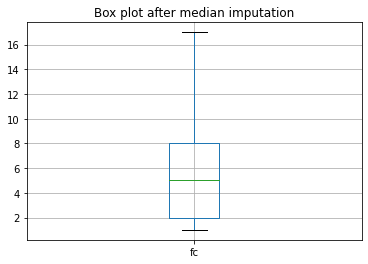

In [42]:
for i in mobile['fc']:
    Q1 = mobile['fc'].quantile(0.25)
    Q3 = mobile['fc'].quantile(0.75)
    IQR = Q3 - Q1
    lower_tail = Q1 - 1.5 * IQR
    upper_tail = Q3 + 1.5 * IQR
    if i > upper_tail or i < lower_tail:
        mobile['fc'] = mobile['fc'].replace(i,np.median(mobile['fc']))

plt.title("Box plot after median imputation")
mobile.boxplot(column='fc',figsize=(8,8));

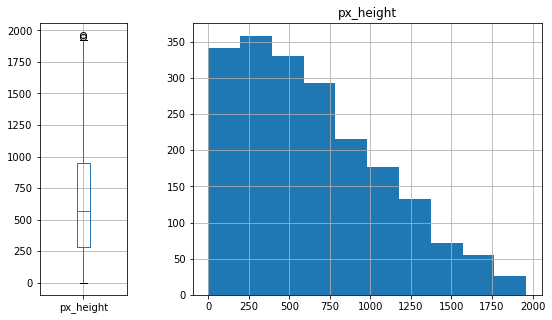

In [43]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
mobile.boxplot(column='px_height',ax=axes[0]);
mobile.hist(column='px_height', ax=axes[1]);

In [44]:
Q1 = mobile['px_height'].quantile(0.25)
Q3 = mobile['px_height'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(284.0, 948.0, 664.0)

In [45]:
small_outliers = mobile['px_height'] < (Q1 - 1.5 * IQR)
big_outliers = mobile['px_height'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 2)

Performing median value imputation to deal with outliers in "px_height" feature

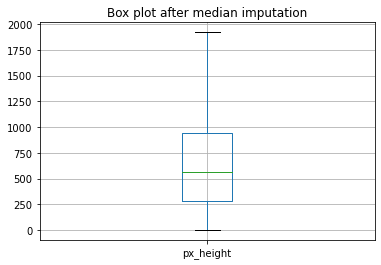

In [46]:
for i in mobile['px_height']:
    Q1 = mobile['px_height'].quantile(0.25)
    Q3 = mobile['px_height'].quantile(0.75)
    IQR = Q3 - Q1
    lower_tail = Q1 - 1.5 * IQR
    upper_tail = Q3 + 1.5 * IQR
    if i > upper_tail or i < lower_tail:
        mobile['px_height'] = mobile['px_height'].replace(i,np.median(mobile['px_height']))

plt.title("Box plot after median imputation")
mobile.boxplot(column='px_height',figsize=(8,8));

# Section 5: Data Distribution

In this section we will visualize our datasets to see the distribution of values in each features and see if there is Gaussianity(normal distribution of data) in those features.


In [47]:
#Divide the features into categorical and continuous
categorical_features=list()
continous_features=list()
for column_name in mobile.columns:
    unique_values = len(mobile[column_name].unique())
    if unique_values < 20:
      categorical_features.append(column_name)
    else:
      continous_features.append(column_name)

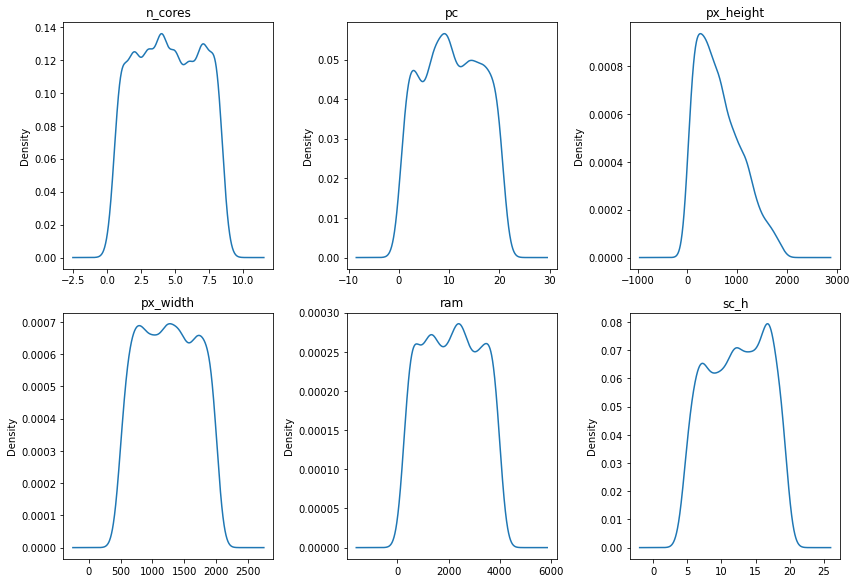

In [48]:
fig = plt.figure(figsize=(12,12))
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    mobile[mobile.columns[i+9]].plot.kde()
    plt.title(mobile.columns[i+9])
fig.tight_layout();

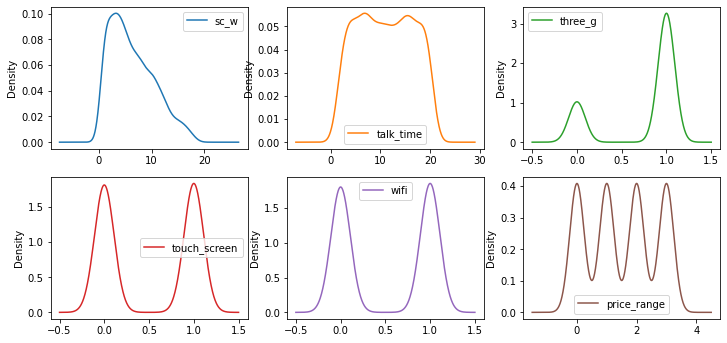

In [49]:
mobile.loc[:,'sc_w':'price_range'].plot.kde(subplots=True,
                                                       layout=(4,3),
                                                       sharex=False, 
                                                       figsize=(12,12));

#### Observation of data distribution of the features:
1. Most of categorical features such as bluetooth (blue), dual_sim, 4G (four_g), touch_screen, wifi and price_range has balanced distribution of values however only 3G (three_g) show imbalance distribution of the data value where there is low number of row with no 3G, but this has no impact to our dataset and analysis since it is clear that most of mobile phone we use have 3G features.

2. Some continous features such as battery power,internal memory (int_memory),mobile depth (m_depth), mobile weight (mobile_wt) show gausiann distribution but there are some which show posititively skewed distribution(right side).

3. Features with Positively skewed distribution (right side) are Screen Width (sc_w), Front Camera (fc), Pixel resolution height (px_height)
    


# SECTION 5: Correlation Analysis

Correlation analysis help to compute pairwise correlation of columns. It is useful in data analysis and modeling to better understand the relationships between variables. This is beacuse variables within a dataset can be related for many reasons. For example one variablecould cause or depend on the values of another variable or slightly associated to another variable.

A correlation among variable can be: Positive Correlation: both variables change in the same direction. (1) Neutral Correlation: No relationship in the change of the variables.(0) Negative Correlation: variables change in opposite directions.(-1)


In [50]:
correlation = mobile.corr()
print(correlation['price_range'].sort_values(ascending = False),'\n')

price_range      1.000e+00
ram              9.170e-01
battery_power    2.007e-01
px_width         1.658e-01
px_height        1.489e-01
int_memory       4.443e-02
sc_w             2.541e-02
three_g          2.361e-02
sc_h             2.299e-02
fc               2.234e-02
talk_time        2.186e-02
blue             2.057e-02
wifi             1.878e-02
dual_sim         1.744e-02
pc               1.681e-02
four_g           1.477e-02
n_cores          4.399e-03
m_dep            8.530e-04
clock_speed     -6.606e-03
mobile_wt       -3.030e-02
touch_screen    -3.041e-02
Name: price_range, dtype: float64 



Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'three_g', 'sc_h', 'fc'],
      dtype='object')


<AxesSubplot:>

Text(0.5, 1.0, 'The correlation matrix of Top 10 correlated features')

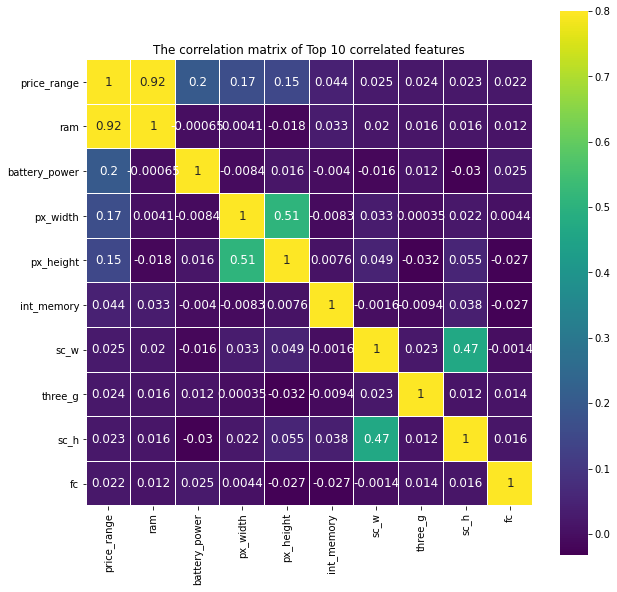

In [62]:
correlation = mobile.corr()
#looking correlation of the best 10features
k= 10
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(mobile[cols].values.T)
f , ax = plt.subplots(figsize = (10,10))
sn.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.title('The correlation matrix of Top 10 correlated features')
plt.show()
f.savefig('Figures/correlation_matrix.jpeg')

In [52]:
priceCorr = correlation.price_range.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 price_range      1.000
ram              0.917
battery_power    0.201
px_width         0.166
px_height        0.149
Name: price_range, dtype: float64 

Most Negative Correlations
 n_cores         4.399e-03
m_dep           8.530e-04
clock_speed    -6.606e-03
mobile_wt      -3.030e-02
touch_screen   -3.041e-02
Name: price_range, dtype: float64


### Results of Correlation Analysis

The most features which are correlated to our target feature(price_range) are RAM, battery power, pixel resolution width and height,since we do have many features in our dataset will keep using all the features to train the model and after that we will train the model again with most correlated features to see if there will be any improvement of the accuracy of the model prediction. The Most 5 negatives correlation features are number of core of processor(n_cores), mobile depth(m_dep), clock speed of the processor, mobile weight and touch_screen


# SECTION 6: Feature Selection
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. Therefore we will use correlation analysis and feature_importances_ method of The scikit-learn library to filter out most important features of our dataset

#### Feature Importance

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.


In [53]:
from sklearn.model_selection import train_test_split
#Data set without target variable
X = mobile.loc[:,mobile.columns != 'price_range']

#target variable
y = mobile['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [54]:
#library
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
model = bestfeatures.fit(X,y)

In [55]:
dfscores = pd.DataFrame(model.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Feature','Score'] 
print(feature_scores.nlargest(20,'Score')) 

          Feature       Score
13            ram  931267.519
11      px_height   17585.294
0   battery_power   14129.867
12       px_width    9810.587
8       mobile_wt      95.973
6      int_memory      89.839
4              fc      15.497
15           sc_w      14.244
16      talk_time      13.236
14           sc_h       9.615
9         n_cores       9.098
18   touch_screen       1.928
10             pc       1.815
5          four_g       1.522
7           m_dep       0.746
1            blue       0.723
2     clock_speed       0.648
3        dual_sim       0.631
19           wifi       0.422
17        three_g       0.328


ExtraTreesClassifier()

<AxesSubplot:>

Text(0.5, 1.0, 'The top 10 best important features')

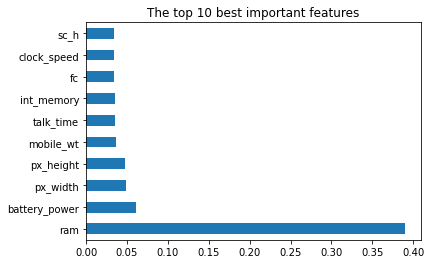

In [56]:
#Apply Feature Importance Method to select most important features
from sklearn.ensemble import ExtraTreesClassifier  
model = ExtraTreesClassifier()
model.fit(X , y)
important_features = pd.Series(model.feature_importances_ , index = X.columns)
important_features.nlargest(10).plot(kind = 'barh')
plt.title("The top 10 best important features")
plt.show()

# SECTION 7: Finishing the preprocessing 

After completing all the preprocessing work we want to save another file which contain preprocessed data which can be used for creating model. However before saving the data we want to split the preprocessed data into two randomly of 80% to 20% spit that can be used for training and testing (which be used for final model testing ) respectively. Through all the learning process we will use training seting.

Randddomly split the preprocessed dataset that can de used for final testing of the model we create 

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mobile, test_size=0.20, shuffle= True, random_state=3, stratify=mobile['price_range'])
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [58]:
#Checking if the split contain all the data
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,959,1,2.6,1,15.0,0,20,1.0,84,4,...,561.0,1631,3965,16,1.0,6,1,0,0,3
1,1724,0,2.0,1,2.0,1,57,0.5,177,3,...,1605.0,1924,2822,19,3.0,16,1,1,0,3
2,1456,1,0.5,1,7.0,0,7,0.4,105,5,...,823.0,1104,1587,6,5.0,20,1,0,1,1
3,1993,1,0.5,0,10.0,1,27,0.3,147,8,...,150.0,510,2437,14,1.0,9,1,0,0,2
4,864,0,1.6,1,2.0,1,53,0.3,88,6,...,262.0,1436,493,18,9.0,10,1,1,0,0


In [59]:
train.shape

(1600, 21)

In [60]:
test.shape

(400, 21)

In [61]:
#Save the file into .csv so that we can use them later
train.to_csv('Data/clean_train.csv', index=False)
test.to_csv('Data/clean_test.csv', index=False)